## Name - Pramukh Bharadwaj Kittoor Muralidhar 
### Github Username - pramukhbharadwaj
### USCID - 7597601620


Import all the required Modules

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import math
import seaborn

### (a) Download the Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column.

In [90]:
df = pd.read_csv('../../data/vertebral_column_data/column_2C.dat', 
                 sep="\s+", names=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'])

df_copy = df.copy(deep = True)

print(df_copy.head())



   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic_radius  degree_spondylolisthesis class  
0          98.67                     -0.25    AB  
1         114.41                      4.56    AB  
2         105.99                     -3.53    AB  
3         101.87                     11.21    AB  
4         108.17                      7.92    AB  


Label Encode the class variable

In [91]:
def encodeClass(x):
    if x == 'NO':
        return 0
    elif x == 'AB':
        return 1

df_copy['class'] = df_copy['class'].apply(encodeClass)

print(df_copy)

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0               63.03        22.55                  39.61         40.48   
1               39.06        10.06                  25.02         29.00   
2               68.83        22.22                  50.09         46.61   
3               69.30        24.65                  44.31         44.64   
4               49.71         9.65                  28.32         40.06   
..                ...          ...                    ...           ...   
305             47.90        13.62                  36.00         34.29   
306             53.94        20.72                  29.22         33.22   
307             61.45        22.69                  46.17         38.75   
308             45.25         8.69                  41.58         36.56   
309             33.84         5.07                  36.64         28.77   

     pelvic_radius  degree_spondylolisthesis  class  
0            98.67                     -0.25 

### (b) Pre-Processing and Exploratory data analysis:

i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

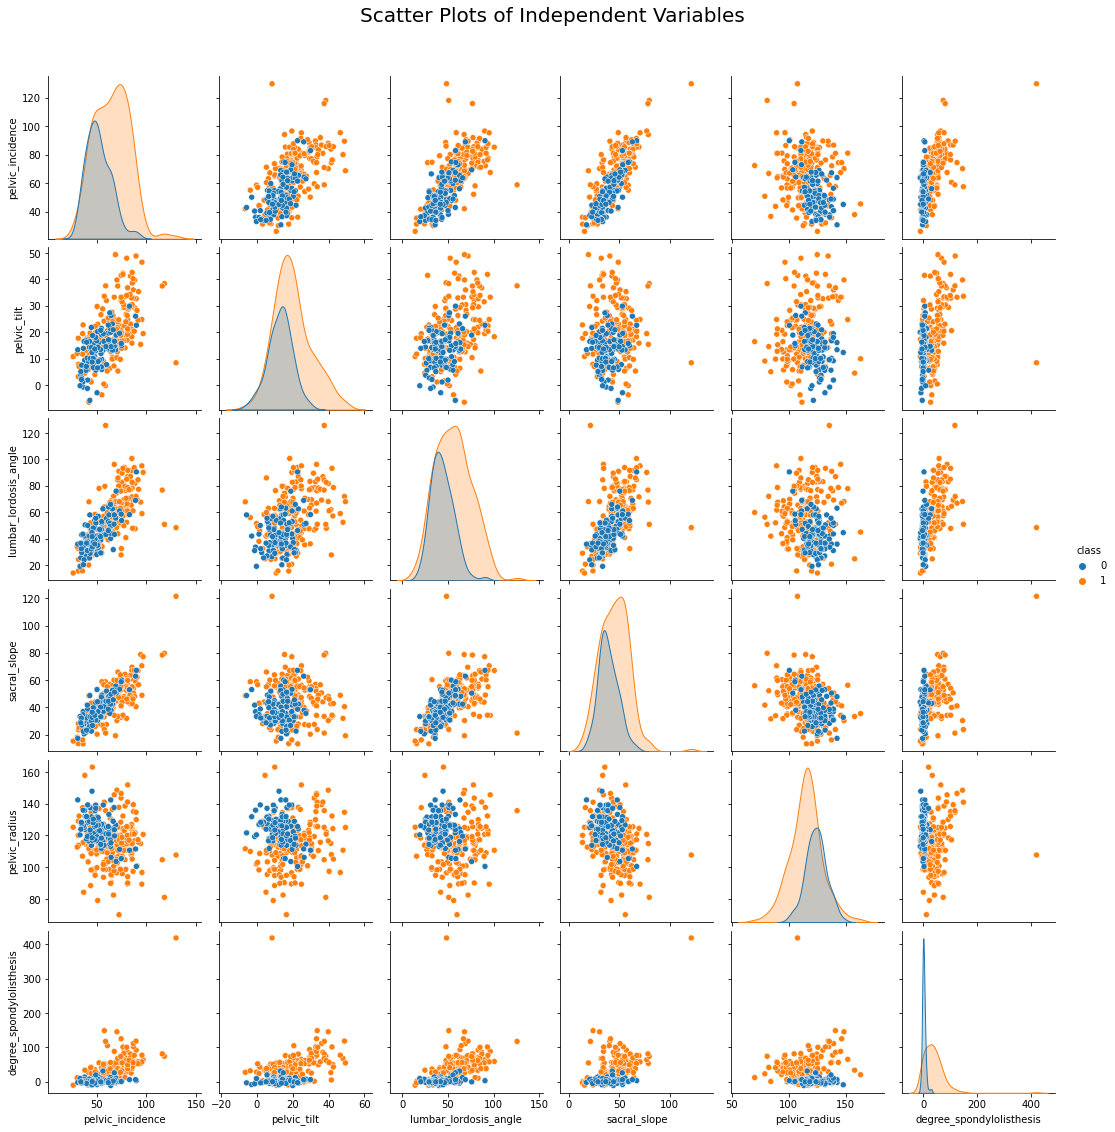

In [92]:
graph = seaborn.pairplot(df_copy, hue ='class')
graph.fig.suptitle('Scatter Plots of Independent Variables',fontsize=20, y=1.05)

# to show
plt.show()

ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1

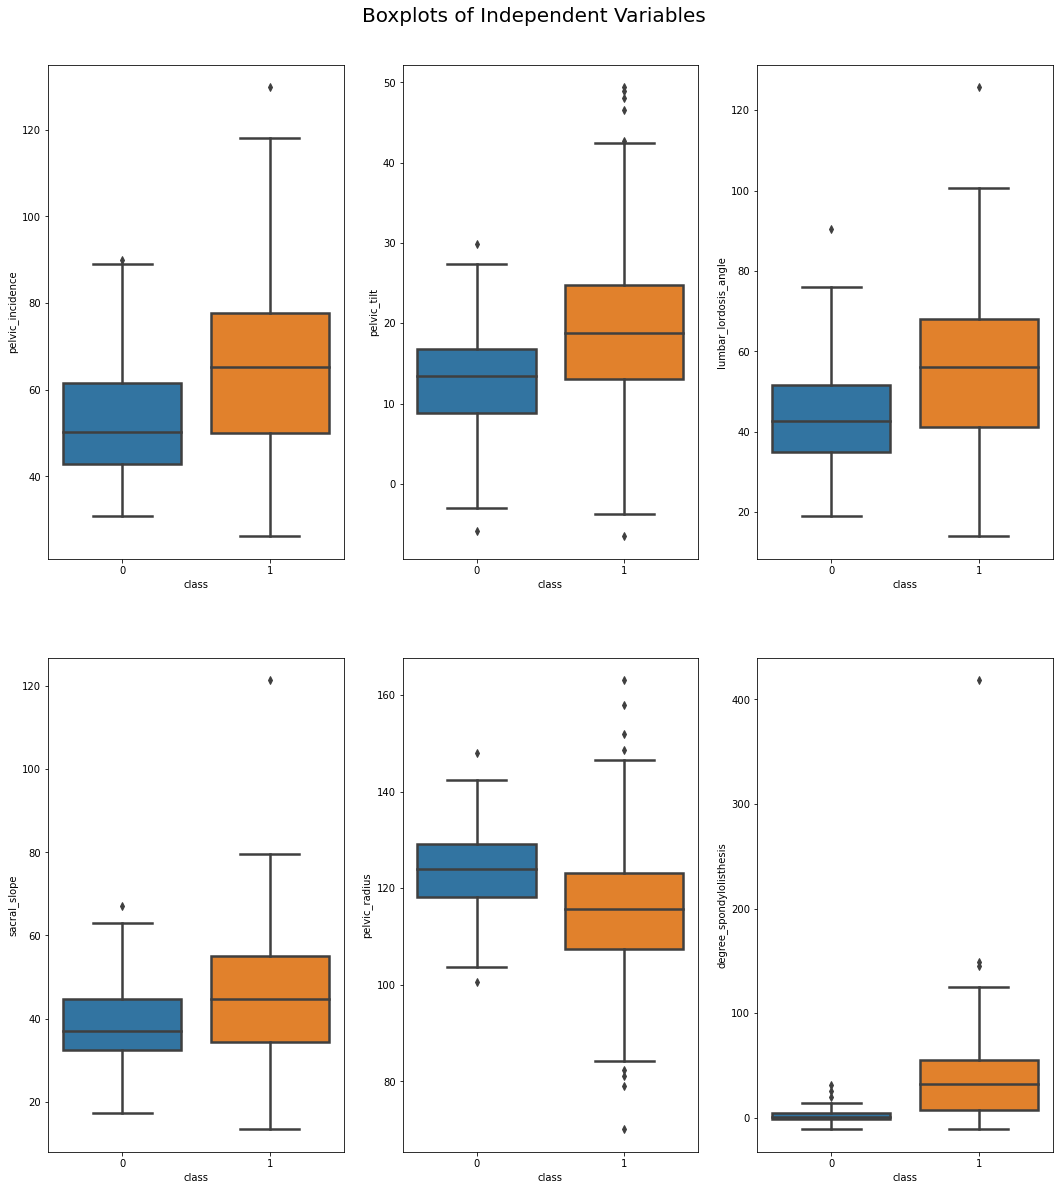

In [93]:
fig, axs = plt.subplots(2, 3, figsize=(18,20))
fig.suptitle('Boxplots of Independent Variables',fontsize=20, y=0.92)
for i in range(6):
    seaborn.boxplot(x = 'class', y = df_copy.columns[i], data = df_copy, ax = axs[i//3][i%3],linewidth=2.5)

iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [94]:
df_with_class_Normal = df_copy[df_copy['class'] == 0] 
df_with_class_Abnormal = df_copy[df_copy['class'] == 1]

train_df_with_class_Normal = df_with_class_Normal[0:70];
train_df_with_class_Abnormal = df_with_class_Abnormal[0:140];

test_df_with_class_Normal = df_with_class_Normal[70:];
test_df_with_class_Abnormal = df_with_class_Abnormal[140:];



df_train_data = pd.concat([train_df_with_class_Normal, train_df_with_class_Abnormal])
df_test_data = pd.concat([test_df_with_class_Normal, test_df_with_class_Abnormal])


x_train, x_test, y_train, y_test = df_train_data.iloc[: , :6], df_test_data.iloc[: , :6], df_train_data.iloc[: , 6], df_test_data.iloc[: , 6]


### (c) Classification using KNN on Vertebral Column Data Set

i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [95]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm = 'auto',metric='euclidean')

ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.

In [96]:
#Train Model and Predict
train_error_rate = {}
test_error_rate = {}
for i in range(208, -2, -3):
 knn.set_params(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_train_value = knn.predict(x_train);
 train_error_rate[i] = np.mean(pred_train_value != y_train)
 pred_test_value = knn.predict(x_test)
 test_error_rate[i] = np.mean(pred_test_value != y_test)

Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order)

Text(0, 0.5, 'Error Rate')

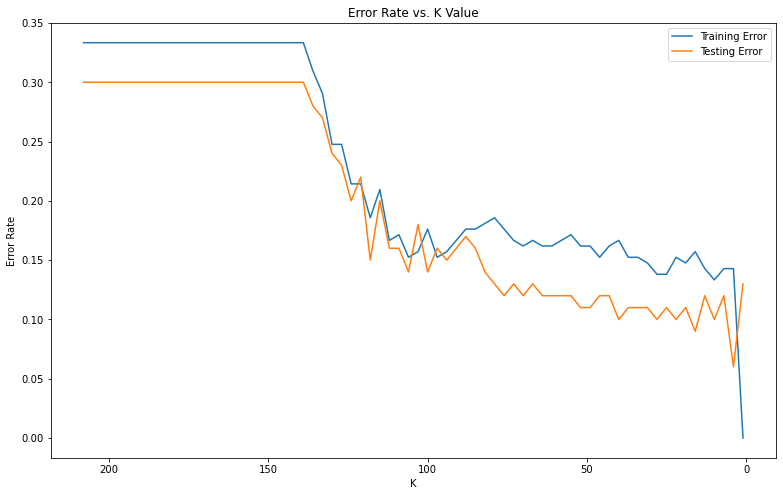

In [97]:
plt.figure(figsize=(13,8))
plt.plot(range(208, -2, -3),train_error_rate.values(), label="Training Error")
plt.plot(range(208, -2, -3),test_error_rate.values(), label="Testing Error")
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.legend()
plt.gca().invert_xaxis()
plt.ylabel('Error Rate')

Which k∗ is the most suitable k among those values?

In [98]:
print("Minimum error:-", min(test_error_rate.values()),"at K =", min(test_error_rate, key=test_error_rate.get), ". So K* =", min(test_error_rate, key=test_error_rate.get))

Minimum error:- 0.06 at K = 4 . So K* = 4


Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when K = K∗.

Confusion Matrix - 
 [[25  5]
 [ 1 69]]


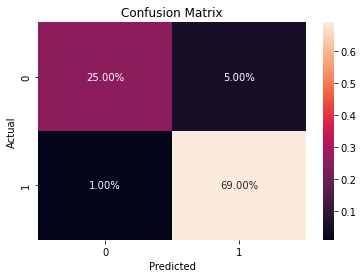

True Positive rate is -  0.9857142857142858
True Negative rate is -  0.8333333333333334
Precision is -  0.9324324324324325
F1-score is -  0.9583333333333333


In [99]:
from sklearn.metrics import confusion_matrix


knn.set_params(n_neighbors=min(test_error_rate, key=test_error_rate.get))
knn.fit(x_train,y_train)
pred_test = knn.predict(x_test)
cnf_matrix = confusion_matrix(y_test, pred_test)

print("Confusion Matrix - \n", cnf_matrix)
fig, axe = plt.subplots(1)
seaborn.heatmap((cnf_matrix / np.sum(cnf_matrix)), annot=True, fmt='.2%')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

TN, FP, FN, TP = cnf_matrix.flatten()

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 
PPV = TP/(TP+FP)
F1 = 2*(TPR*PPV)/(TPR+PPV)

print("True Positive rate is - ", TPR)
print("True Negative rate is - ", TNR)
print("Precision is - ", PPV)
print("F1-score is - ", F1)

iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate,3 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}.4 Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196}. This plot is called a Learning Curve.

Training Set :  10 Optimal k :  1 best test error rate :  0.24
Training Set :  20 Optimal k :  6 best test error rate :  0.19
Training Set :  30 Optimal k :  1 best test error rate :  0.22
Training Set :  40 Optimal k :  11 best test error rate :  0.25
Training Set :  50 Optimal k :  16 best test error rate :  0.3
Training Set :  60 Optimal k :  21 best test error rate :  0.29
Training Set :  70 Optimal k :  26 best test error rate :  0.29
Training Set :  80 Optimal k :  31 best test error rate :  0.29
Training Set :  90 Optimal k :  41 best test error rate :  0.29
Training Set :  100 Optimal k :  46 best test error rate :  0.28
Training Set :  110 Optimal k :  6 best test error rate :  0.22
Training Set :  120 Optimal k :  16 best test error rate :  0.17
Training Set :  130 Optimal k :  16 best test error rate :  0.16
Training Set :  140 Optimal k :  16 best test error rate :  0.15
Training Set :  150 Optimal k :  16 best test error rate :  0.13
Training Set :  160 Optimal k :  6 best

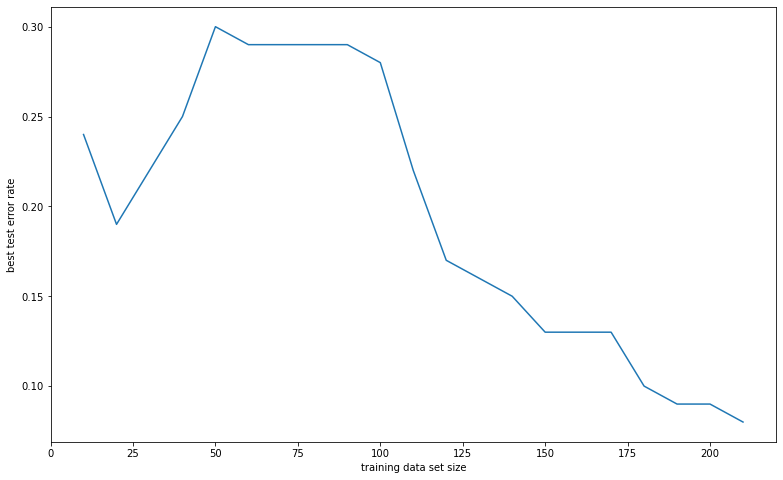

In [100]:
learningCurve = {}
for n in range(10, 220, 10):
    train_data_Normal = df_with_class_Normal[:math.floor(n/3)];
    train_data_Abnormal = df_with_class_Abnormal[:math.floor(n-(n/3))];



    df_train_data = pd.concat([train_data_Normal, train_data_Abnormal])

    x_train, x_test, y_train, y_test = df_train_data.iloc[: , :6], df_test_data.iloc[: , :6], df_train_data.iloc[: , 6], df_test_data.iloc[: , 6]

    
    minErrorRate = 2; optimalK = 0;
    for i in range(1,n, 5):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train,y_train)
        pred_i = knn.predict(x_test)
        if np.mean(pred_i != y_test) < minErrorRate:
            minErrorRate = np.mean(pred_i != y_test)
            optimalK = i;
        
    learningCurve[n] =  (minErrorRate, optimalK);
    
    
for key in learningCurve:
    print('Training Set : ', key, 'Optimal k : ', learningCurve[key][1], 'best test error rate : ', learningCurve[key][0])

plt.figure(figsize=(13, 8))
plt.plot(learningCurve.keys(), [i[0] for i in learningCurve.values()])
plt.xlabel('training data set size')
plt.ylabel('best test error rate')
plt.show()

### d. Replace the Euclidean metric with the following metrics5 and test them. Sum- marize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}.

i. Minkowski Distance:

A. which becomes Manhattan Distance with p = 1.

1   0.12
6   0.11
11   0.11
16   0.12
21   0.12
26   0.11
31   0.12
36   0.13
41   0.13
46   0.13
51   0.14
56   0.13
61   0.15
66   0.15
71   0.14
76   0.14
81   0.16
86   0.15
91   0.2
96   0.2
101   0.22
106   0.21
111   0.23
116   0.21
121   0.22
126   0.24
131   0.28
136   0.28
141   0.3
146   0.3
151   0.3
156   0.3
161   0.3
166   0.3
171   0.3
176   0.3
181   0.3
186   0.3
191   0.3
196   0.3


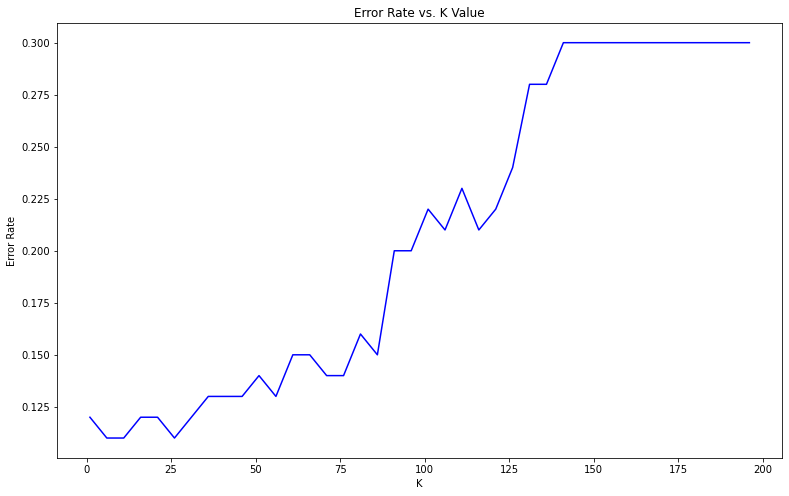

In [101]:
#Train Model and Predict
error_rate = {}
for i in range(1,201, 5):
 knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate[i] = np.mean(pred_i != y_test)

for key in error_rate:
    print(key," ", error_rate[key])

plt.figure(figsize=(13,8))
plt.plot(range(1,201, 5),error_rate.values(), color='blue')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
manhattanOptimalK=min(error_rate, key=error_rate.get);

In [102]:
best_K = []
for key in error_rate:
    if(error_rate[key] == min(error_rate.values())):
        best_K.append(key)
        
print('K = ',best_K,' all have the least test error rate of', min(error_rate.values()))

K =  [6, 11, 26]  all have the least test error rate of 0.11


In [103]:
from sklearn.metrics import f1_score

f1_scores = []
for k in range(1,201, 5):
    knn.set_params(p = 1, n_neighbors = k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    f1_scores.append(f1_score(y_test, y_pred))

f1_scores_df = pd.DataFrame({'k': range(1,201, 5), 'F1_score':f1_scores})
f1_scores_df

,k,F1_score
0,1,0.918919
1,6,0.924138
2,11,0.926174
3,16,0.920000
4,21,0.920000
5,26,0.926174
6,31,0.920000
7,36,0.912752
8,41,0.912752
9,46,0.912752


Text(0, 0.5, 'F1 score')

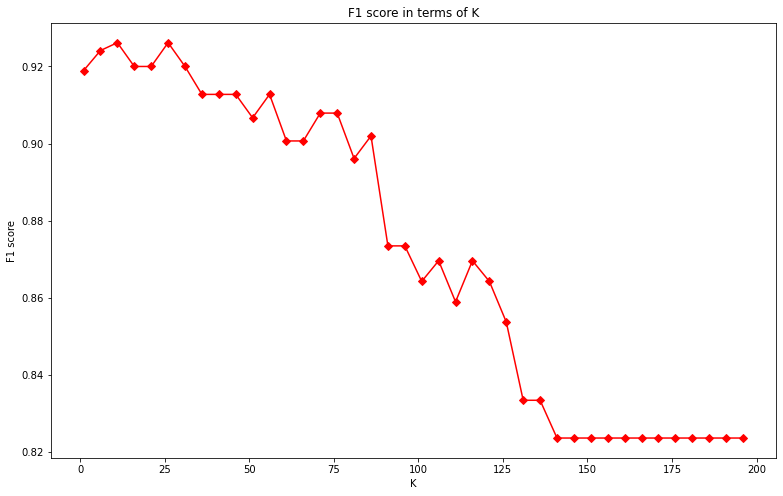

In [104]:
plt.figure(figsize=(13, 8))
plt.plot(range(1,201, 5),f1_scores,'-rD', label="F1 Score",)
plt.title('F1 score in terms of K')
plt.xlabel('K')
plt.ylabel('F1 score')

In [105]:
best_K = f1_scores_df.loc[f1_scores_df.F1_score == max(f1_scores_df.F1_score)]
best_K
print('K =',np.array(best_K['k']),' have the best F1-score of', max(f1_scores_df.F1_score))

K = [11 26]  have the best F1-score of 0.9261744966442954


B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [106]:
log_p_range = np.linspace(0.1, 1, 10)
p_range = np.logspace(0.1, 1, 10)
p_range

array([ 1.25892541,  1.58489319,  1.99526231,  2.51188643,  3.16227766,
        3.98107171,  5.01187234,  6.30957344,  7.94328235, 10.        ])

In [107]:
# Let us take k* = 11
knn = KNeighborsClassifier(metric='minkowski', n_neighbors=11)
f1_scores = []
error_rate = []
for p in p_range:
    knn.set_params(p = p)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    f1_scores.append(f1_score(y_test, y_pred))
    error_rate.append(np.mean(y_pred != y_test))
    
metrics_df = pd.DataFrame({'p': p_range,'log_p': log_p_range,'error_rate':error_rate, 'f1_score':f1_scores})
metrics_df

,p,log_p,error_rate,f1_score
0,1.258925,0.1,0.11,0.926174
1,1.584893,0.2,0.11,0.927152
2,1.995262,0.3,0.12,0.921053
3,2.511886,0.4,0.12,0.921053
4,3.162278,0.5,0.12,0.921053
5,3.981072,0.6,0.12,0.921053
6,5.011872,0.7,0.12,0.921053
7,6.309573,0.8,0.11,0.927152
8,7.943282,0.9,0.11,0.927152
9,10.000000,1.0,0.11,0.927152


Text(0, 0.5, 'Error rate')

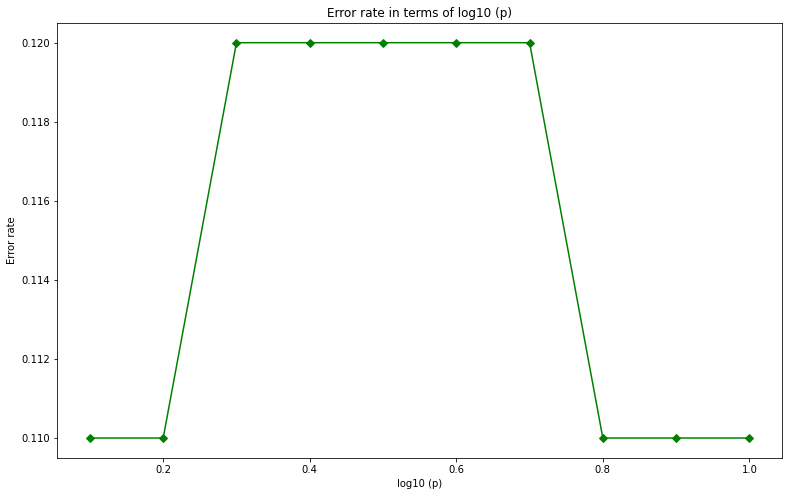

In [108]:
plt.figure(figsize=(13, 8))
plt.plot(log_p_range,error_rate,'-gD', label="Error rate",)
plt.title('Error rate in terms of log10 (p)')
plt.xlabel('log10 (p)')
plt.ylabel('Error rate')

Text(0, 0.5, 'F1-score')

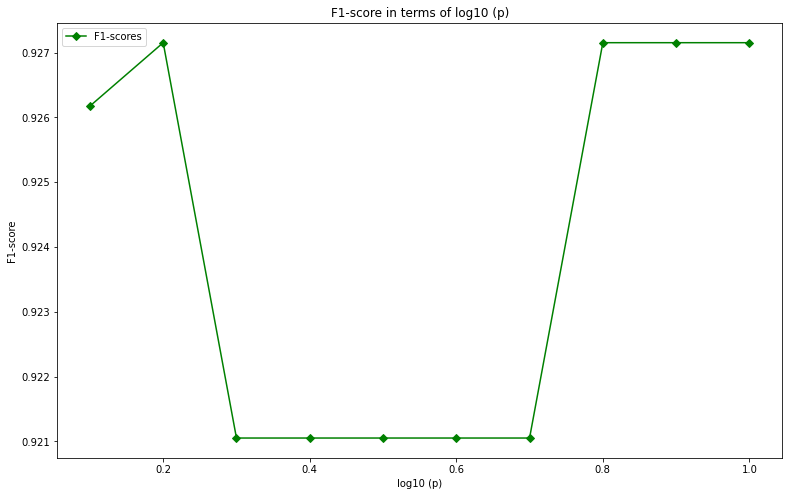

In [109]:
plt.figure(figsize=(13, 8))
plt.plot(log_p_range,f1_scores,'-gD', label="F1-scores",)
plt.title('F1-score in terms of log10 (p)')
plt.legend()
plt.xlabel('log10 (p)')
plt.ylabel('F1-score')

In [110]:
best_p = metrics_df.loc[(metrics_df.error_rate == min(metrics_df.error_rate))]
best_p
print('log10(p) =',np.array(best_p['log_p']),'have the  best error rate of',min(metrics_df.error_rate))

log10(p) = [0.1 0.2 0.8 0.9 1. ] have the  best error rate of 0.11


C. which becomes Chebyshev Distance with p → ∞

In [111]:
#Train Model and Predict
error_rate = []
f1_scores = []
for i in range(1,201, 5):
 knn = KNeighborsClassifier(n_neighbors=i, metric='chebyshev')
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))
 f1_scores.append(f1_score(y_test, pred_i))

metrics_df = pd.DataFrame({'k': range(1,201, 5),'error_rate': error_rate ,'F1_score':f1_scores})
metrics_df

,k,error_rate,F1_score
0,1,0.13,0.911565
1,6,0.10,0.931507
2,11,0.12,0.921053
3,16,0.08,0.945946
4,21,0.11,0.926174
5,26,0.12,0.920000
6,31,0.12,0.920000
7,36,0.10,0.932432
8,41,0.13,0.913907
9,46,0.12,0.920000


Text(0, 0.5, 'Error rate')

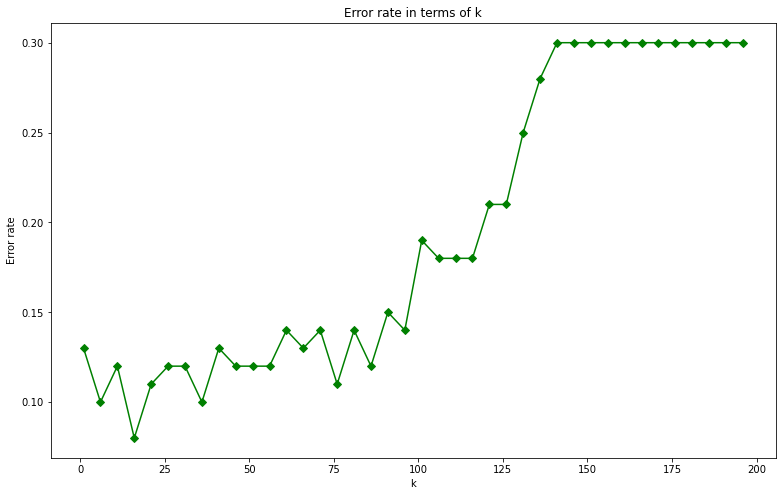

In [112]:
plt.figure(figsize=(13, 8))
plt.plot(range(1,201, 5),error_rate,'-gD', label="Error rate",)
plt.title('Error rate in terms of k')
plt.xlabel('k')
plt.ylabel('Error rate')

Text(0, 0.5, 'F1-score')

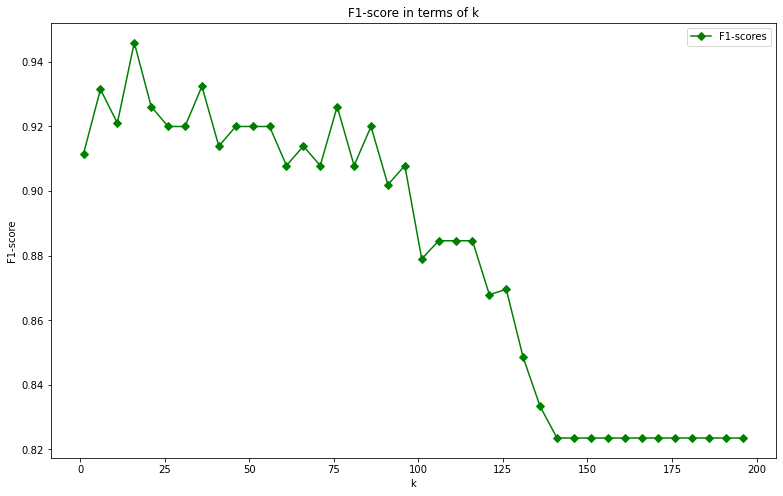

In [113]:
plt.figure(figsize=(13, 8))
plt.plot(range(1,201, 5),f1_scores,'-gD', label="F1-scores",)
plt.title('F1-score in terms of k')
plt.legend()
plt.xlabel('k')
plt.ylabel('F1-score')

In [114]:
best_p = metrics_df.loc[(metrics_df.error_rate == min(metrics_df.error_rate))]
best_p
print('k =',np.array(best_p['k']),'have the best error rate of',min(metrics_df.error_rate))

k = [16] have the best error rate of 0.08


ii. Mahalanobis Distance

In [115]:
Cov = np.cov(x_train.values.T)
invCov = np.linalg.inv(Cov)
knn = KNeighborsClassifier(metric='mahalanobis',metric_params={'VI': invCov})

#Train Model and Predict
error_rate = []
f1_scores = []
for i in range(1,201, 5):
 knn.set_params(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))
 f1_scores.append(f1_score(y_test, pred_i))

metrics_df = pd.DataFrame({'k': range(1,201, 5),'error_rate': error_rate,'F1_score':f1_scores })
metrics_df

,k,error_rate,F1_score
0,1,0.17,0.884354
1,6,0.17,0.882759
2,11,0.20,0.866667
3,16,0.20,0.868421
4,21,0.21,0.860927
5,26,0.20,0.868421
6,31,0.23,0.853503
7,36,0.21,0.864516
8,41,0.24,0.848101
9,46,0.24,0.848101


Text(0, 0.5, 'Error rate')

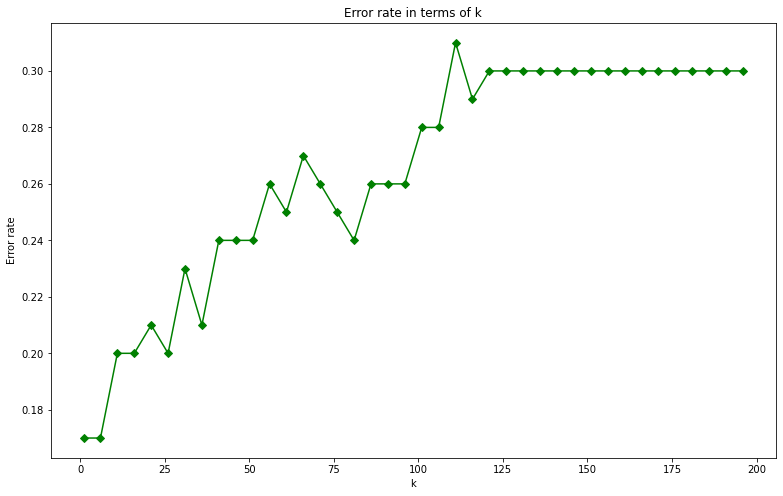

In [116]:
plt.figure(figsize=(13, 8))
plt.plot(range(1,201, 5),error_rate,'-gD', label="Error rate",)
plt.title('Error rate in terms of k')
plt.xlabel('k')
plt.ylabel('Error rate')

Text(0, 0.5, 'F1-score')

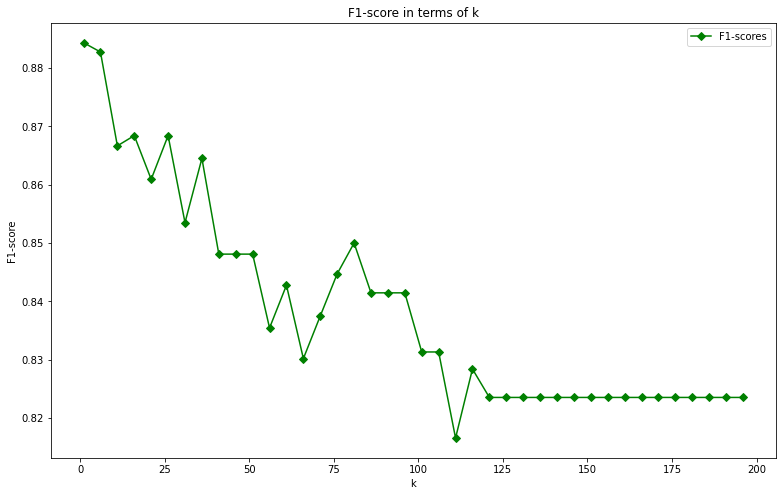

In [117]:
plt.figure(figsize=(13, 8))
plt.plot(range(1,201, 5),f1_scores,'-gD', label="F1-scores",)
plt.title('F1-score in terms of k')
plt.legend()
plt.xlabel('k')
plt.ylabel('F1-score')

In [118]:
best_p = metrics_df.loc[(metrics_df.error_rate == min(metrics_df.error_rate))]
best_p
print('k =',np.array(best_p['k']),'have the best error rate of',min(metrics_df.error_rate))

k = [1 6] have the best error rate of 0.17


### E. The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}

KNN weighted voting with Euclidean

In [119]:
knn = KNeighborsClassifier(metric='euclidean', weights='distance')

#Train Model and Predict
error_rate = []
f1_scores = []
for i in range(1,201, 5):
 knn.set_params(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_test_value = knn.predict(x_test)
 error_rate.append(np.mean(pred_test_value != y_test))
 f1_scores.append(f1_score(y_test, pred_test_value))
    
metrics_df = pd.DataFrame({'k': range(1,201, 5),'error_rate': error_rate,'F1_score':f1_scores })
metrics_df

,k,error_rate,F1_score
0,1,0.13,0.911565
1,6,0.10,0.933333
2,11,0.12,0.921053
3,16,0.11,0.927152
4,21,0.11,0.926174
5,26,0.11,0.926174
6,31,0.11,0.926174
7,36,0.11,0.926174
8,41,0.11,0.926174
9,46,0.11,0.926174


Text(0, 0.5, 'Error rate')

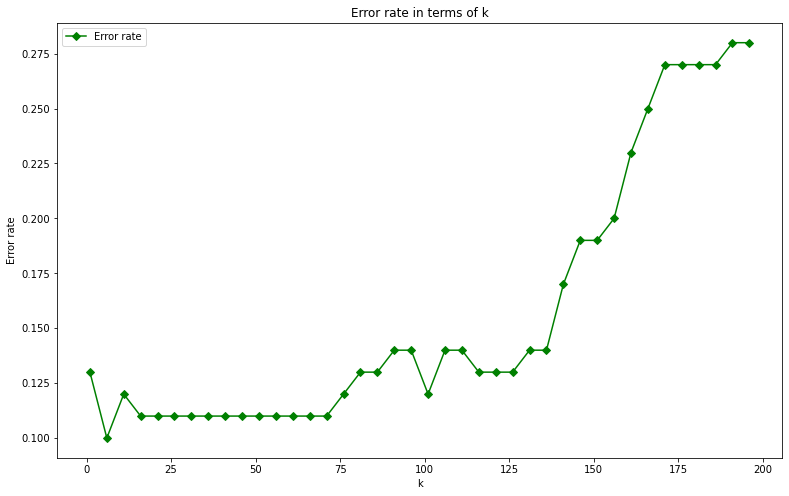

In [120]:
plt.figure(figsize=(13, 8))
plt.plot(range(1,201, 5),error_rate,'-gD', label="Error rate",)
plt.title('Error rate in terms of k')
plt.legend()
plt.xlabel('k')
plt.ylabel('Error rate')

Text(0, 0.5, 'F1-score')

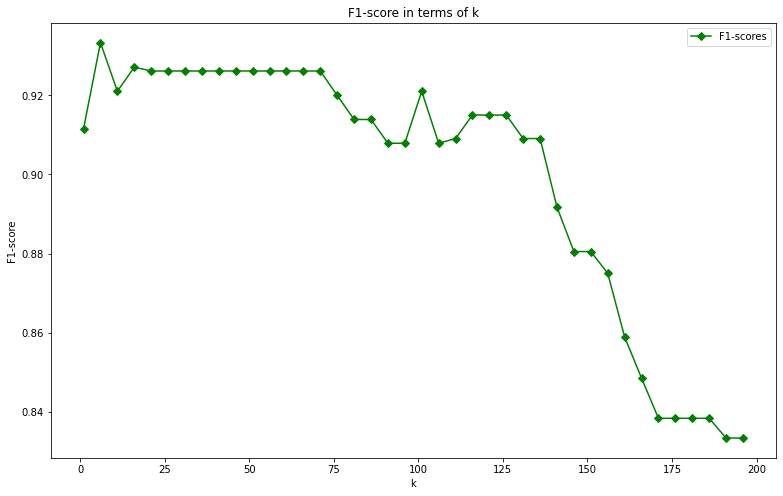

In [121]:
plt.figure(figsize=(13, 8))
plt.plot(range(1,201, 5),f1_scores,'-gD', label="F1-scores",)
plt.title('F1-score in terms of k')
plt.legend()
plt.xlabel('k')
plt.ylabel('F1-score')

In [122]:
best_k = metrics_df.loc[(metrics_df.error_rate == min(metrics_df.error_rate))]
best_k
print('k =',np.array(best_k['k']),'have the best error rate of',min(metrics_df.error_rate))

k = [6] have the best error rate of 0.1


KNN weighted voting with Manhattan

In [123]:
knn = KNeighborsClassifier(metric='manhattan', weights='distance')

#Train Model and Predict
error_rate = []
f1_scores = []
for i in range(1,201, 5):
 knn.set_params(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_test_value = knn.predict(x_test)
 error_rate.append(np.mean(pred_test_value != y_test))
 f1_scores.append(f1_score(y_test, pred_test_value))
    
metrics_df = pd.DataFrame({'k': range(1,201, 5),'error_rate': error_rate,'F1_score':f1_scores })
metrics_df

,k,error_rate,F1_score
0,1,0.12,0.918919
1,6,0.11,0.926174
2,11,0.11,0.926174
3,16,0.12,0.920000
4,21,0.11,0.926174
5,26,0.10,0.932432
6,31,0.11,0.926174
7,36,0.11,0.926174
8,41,0.11,0.926174
9,46,0.11,0.925170


Text(0, 0.5, 'Error rate')

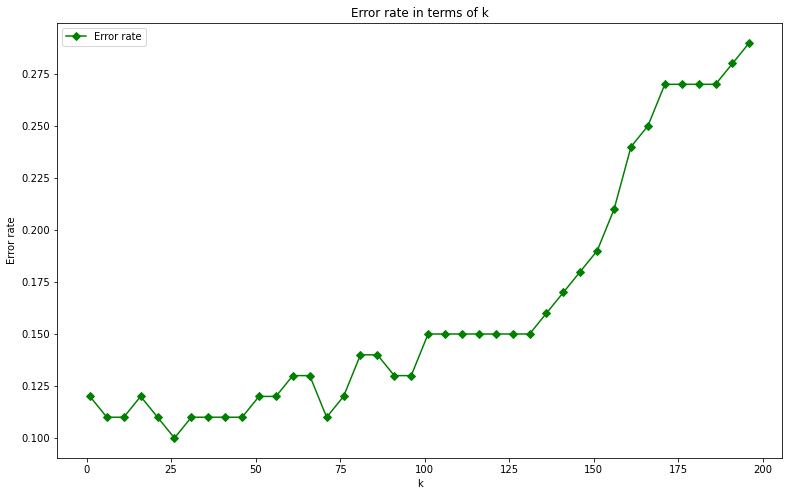

In [124]:
plt.figure(figsize=(13, 8))
plt.plot(range(1,201, 5),error_rate,'-gD', label="Error rate",)
plt.title('Error rate in terms of k')
plt.legend()
plt.xlabel('k')
plt.ylabel('Error rate')

Text(0, 0.5, 'F1-score')

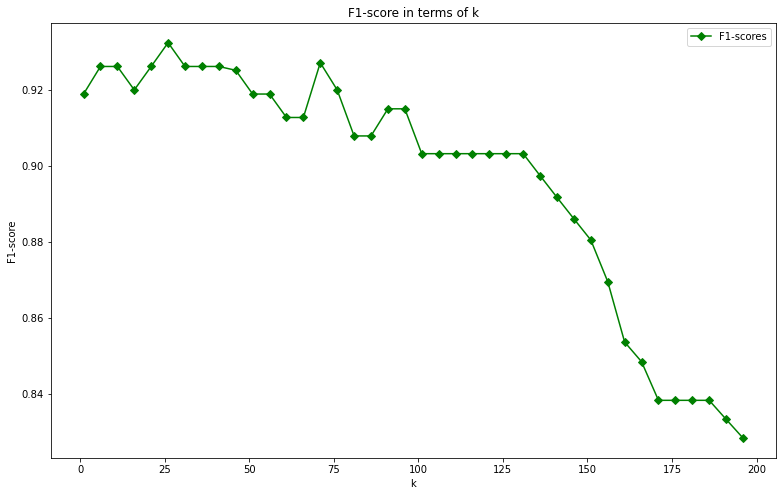

In [125]:
plt.figure(figsize=(13, 8))
plt.plot(range(1,201, 5),f1_scores,'-gD', label="F1-scores",)
plt.title('F1-score in terms of k')
plt.legend()
plt.xlabel('k')
plt.ylabel('F1-score')

In [126]:
best_k = metrics_df.loc[(metrics_df.error_rate == min(metrics_df.error_rate))]
best_k
print('k =',np.array(best_k['k']),'have the best error rate of',min(metrics_df.error_rate))

k = [26] have the best error rate of 0.1


KNN weighted voting with Chebychev


In [127]:
knn = KNeighborsClassifier(metric='chebyshev', weights='distance')

#Train Model and Predict
error_rate = []
f1_scores = []
for i in range(1,201, 5):
 knn.set_params(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_test_value = knn.predict(x_test)
 error_rate.append(np.mean(pred_test_value != y_test))
 f1_scores.append(f1_score(y_test, pred_test_value))
    
metrics_df = pd.DataFrame({'k': range(1,201, 5),'error_rate': error_rate,'F1_score':f1_scores })
metrics_df

,k,error_rate,F1_score
0,1,0.13,0.911565
1,6,0.13,0.912752
2,11,0.12,0.921053
3,16,0.11,0.927152
4,21,0.12,0.920000
5,26,0.12,0.920000
6,31,0.11,0.926174
7,36,0.11,0.926174
8,41,0.11,0.926174
9,46,0.12,0.920000


Text(0, 0.5, 'Error rate')

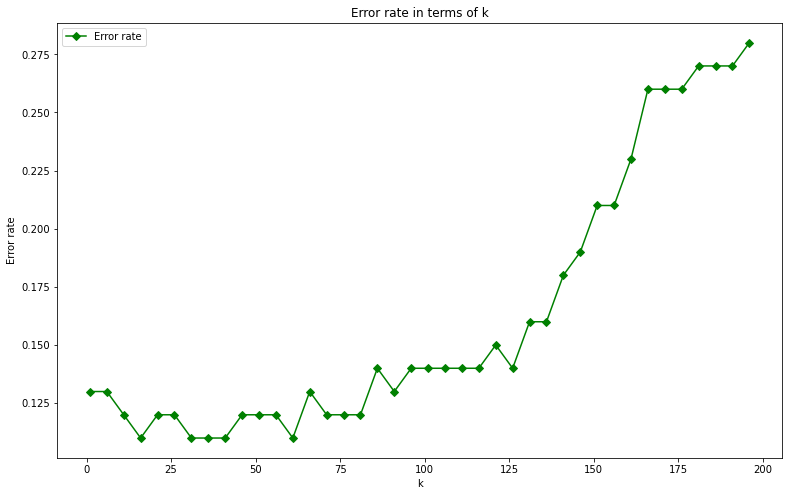

In [128]:
plt.figure(figsize=(13, 8))
plt.plot(range(1,201, 5),error_rate,'-gD', label="Error rate",)
plt.title('Error rate in terms of k')
plt.legend()
plt.xlabel('k')
plt.ylabel('Error rate')

Text(0, 0.5, 'F1-score')

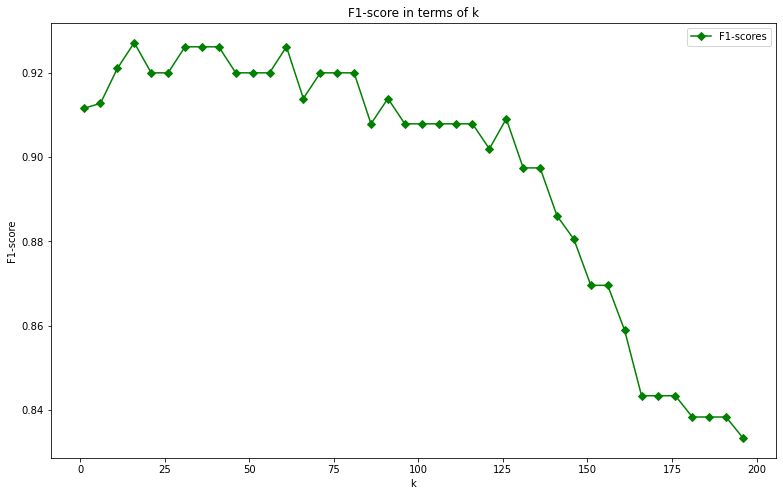

In [129]:
plt.figure(figsize=(13, 8))
plt.plot(range(1,201, 5),f1_scores,'-gD', label="F1-scores",)
plt.title('F1-score in terms of k')
plt.legend()
plt.xlabel('k')
plt.ylabel('F1-score')

In [130]:
best_k = metrics_df.loc[(metrics_df.error_rate == min(metrics_df.error_rate))]
best_k
print('k =',np.array(best_k['k']),'have the best error rate of',min(metrics_df.error_rate))

k = [16 31 36 41 61] have the best error rate of 0.11


### (f) What is the lowest training error rate you achieved in this homework?

The lowest training error rate is 0 when k=1, in which case the nearest neighbor of every point is itself, Thus, the classification will be always correct.